# scikit-learn

## Basic dataset for supervised Learning: Iris and California housing

In [2]:
from sklearn.datasets import fetch_california_housing, load_iris

# Load the California housing dataset
housing = fetch_california_housing()
print("California Housing Dataset:")
print("Data shape:", housing.data.shape)
print("Feature names:", housing.feature_names)
print("Target shape:", housing.target.shape)

# Load the Iris dataset
iris = load_iris()
print("Iris Dataset:")
print("Data shape:", iris.data.shape)
print("Feature names:", iris.feature_names)
print("Target shape:", iris.target.shape)

California Housing Dataset:
Data shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target shape: (20640,)
Iris Dataset:
Data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape: (150,)


### Plot the iris dataset features



    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

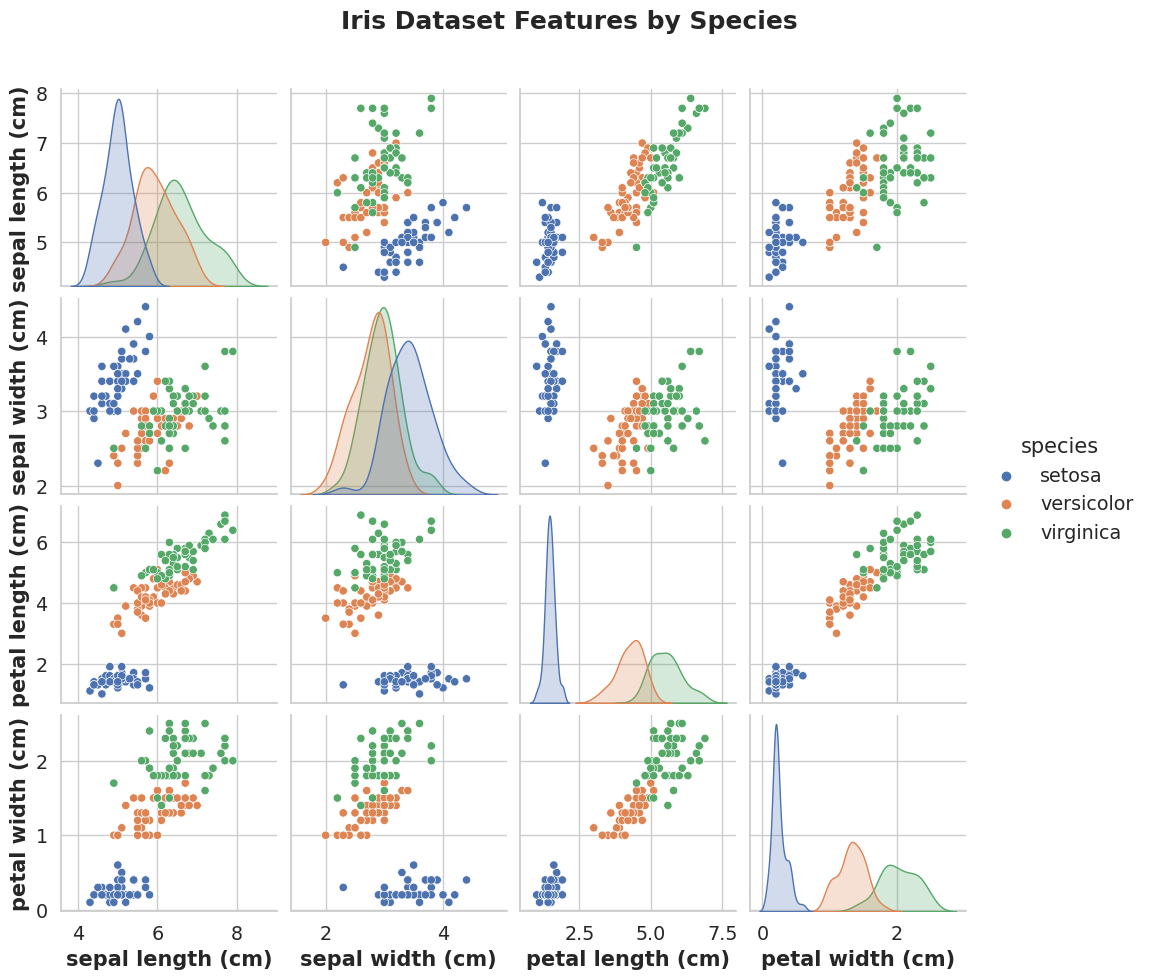

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
iris = load_iris()
# Convert to a DataFrame for better readability
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# Show the first few rows of the dataframe

print(iris_df.head(15))

# Set context to "notebook" and font scale to 1.25 for larger text
sns.set(context='notebook', style='whitegrid', font_scale=1.25)

# Create the pairplot with bold text for labels
pair_plot = sns.pairplot(iris_df, hue='species')#, plot_kws={'size': 5})

# Set bold font for the labels within the plot
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold')

# Adjust further properties of the plot if needed
plt.subplots_adjust(top=0.9)
plt.suptitle("Iris Dataset Features by Species", fontweight='bold')

# Show the plot
plt.show()

### Plot the California housing dataset features

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


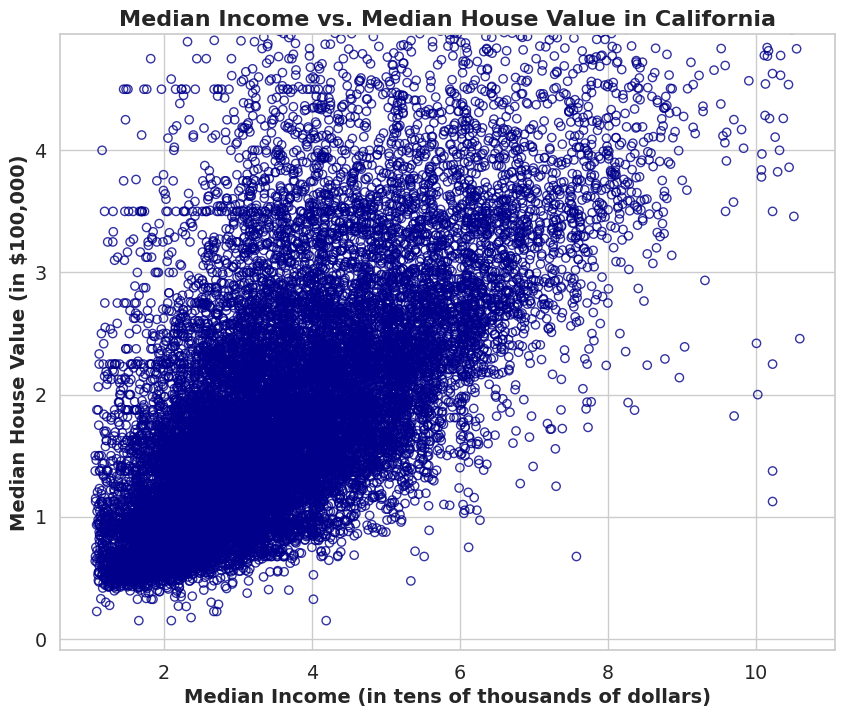

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch the California housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Adding the target (Median House Value) to the DataFrame
housing_df['MedHouseVal'] = housing.target

print(housing_df['MedHouseVal'])

# Plotting Median Income vs. Median House Value
plt.figure(figsize=(10, 8))
# Calculate the 5th and 95th percentiles
lower_percentile = housing_df['MedHouseVal'].quantile(0.01)
upper_percentile = housing_df['MedHouseVal'].quantile(0.99)
# Use the clip function to winsorize the data at the 5% level
df_new = housing_df[(housing_df['MedHouseVal'] >= lower_percentile) & (housing_df['MedHouseVal'] <= upper_percentile)]

# Calculate the 5th and 95th percentiles
lower_percentile = housing_df['MedInc'].quantile(0.01)
upper_percentile = housing_df['MedInc'].quantile(0.99)
# Use the clip function to winsorize the data at the 5% level
df_new = housing_df[(housing_df['MedInc'] >= lower_percentile) & (housing_df['MedInc'] <= upper_percentile)]

plt.scatter(df_new['MedInc'], df_new['MedHouseVal'], edgecolors='darkblue', alpha=0.8, facecolors='none')
plt.xlabel('Median Income (in tens of thousands of dollars)', fontsize=14, fontweight='bold')
plt.ylabel('Median House Value (in $100,000)', fontsize=14, fontweight='bold')
plt.title('Median Income vs. Median House Value in California', fontsize=16, fontweight='bold')
plt.ylim([None, 4.95])
plt.show()